Homework 3

Math Tools for Neural and Cog Sci

Reuben Feinman

# Problem #1

In [38]:
from __future__ import division, print_function
import scipy.io as sio
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

In [19]:
# Load the data matrix 'M'
M = sio.loadmat('PCA.mat')['M']
print(M.shape)

(150, 14)


## (a)

In [20]:
# Create new matrix M_tilde. From each row of M, 
# subtract the mean of that row to get M_tilde row.
M_means = M.mean(axis=1)
M_tilde = np.zeros_like(M)
for i in range(M.shape[0]):
    M_tilde[i] = M[i] - M_means[i]

In [21]:
def svd(matrix):
    """
    A wrapper for numpy's SVD because numpy returns 
    singular values as an array (weird).
    """
    U, s, Vh = np.linalg.svd(matrix)
    S = np.zeros(matrix.shape, dtype=float)
    S[:len(s), :len(s)] = np.diag(s)
    return U, S, Vh

Recalling from class, for a matrix $\tilde{M}$ with SVD decomposition $\tilde{M} = USV^T$, the eigenvalue decomposition of the matrix $\tilde{M}^T\tilde{M}$ comes out to be $\tilde{M}^T\tilde{M} = V(S^TS)V^T$. Thus, the eigenvalues are the diagonal values of the matrix $S^TS$ (i.e. the singular values in $S$, squared) and the eigenvectors are the columns of $V$.

In [23]:
U, S, Vh = svd(M_tilde)

In [34]:
# Display the eigenvectors
print('Eigenvectors:')

for i, vec in enumerate([Vh[i] for i in range(Vh.shape[0])]):
    print("%0.2i: " % i, vec)

Eigenvectors:
00:  [-0.34143835 -0.33846835 -0.37687186 -0.3557049   0.36366401  0.33460358
  0.34944241  0.35842609  0.04261714  0.02373688  0.02573544 -0.03038708
 -0.03021717 -0.02513782]
01:  [-0.02423879 -0.03019751 -0.01767955 -0.02606894  0.01801246  0.06887694
  0.00676668  0.01671515 -0.4127319  -0.40326387 -0.40990575  0.40921324
  0.39697884  0.407523  ]
02:  [-0.55129212 -0.14594673  0.46450842  0.2928906   0.34870855 -0.29523731
 -0.1355069   0.18216142 -0.19011749  0.08258217  0.01838775  0.18642319
 -0.09970516 -0.15785641]
03:  [ 0.02534686 -0.4013639   0.45884303 -0.37096648 -0.16186625 -0.04545518
  0.3820342  -0.4101125   0.18592648 -0.02634879  0.10278505  0.26044253
  0.13083584 -0.13010088]
04:  [ -1.67924081e-02  -3.38506670e-01   1.26916926e-01  -4.67105251e-02
  -2.36124384e-01   1.27469205e-01  -1.17435675e-01   8.72609905e-05
  -3.48130797e-01   6.39901632e-01  -2.02988546e-02  -2.46311798e-01
   4.29822411e-02   4.32953847e-01]
05:  [ 0.17159172  0.23975715 

In [35]:
D = np.matmul(S.T, S)
eigenvalues = [D[i,i] for i in range(len(D))]

Let's go ahead and plot the eigenvalues now.

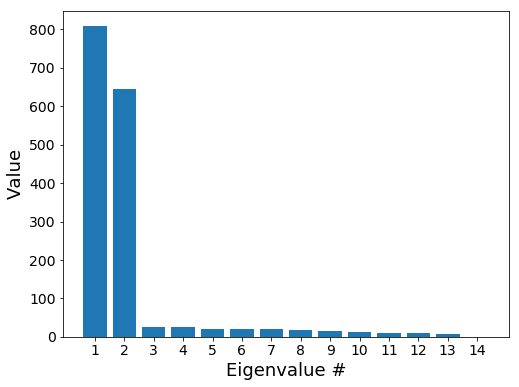

In [51]:
# eigenvalue indices
inds = list(range(1, len(eigenvalues)+1))
plt.figure(figsize=(8,6))
plt.bar(inds, eigenvalues)
plt.xticks(inds, fontsize='14')
plt.yticks(fontsize='14')
plt.xlabel('Eigenvalue #', fontsize='18')
plt.ylabel('Value', fontsize='18')
plt.show()

In [53]:
sum(eigenvalues)

1639.5914464575887

I think that this dataset has a "true" dimensionality of 2. As you can see by the eigenvalues, the majority of the variance in the data (nearly 90%) occurs along the first 2 principle component axes. The 3rd eigenvalue shows a very sharp decline from the first 2.

## (b)